In [1]:
# import libraries
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv("data/Final_cleaned_up_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df = pd.get_dummies(df, columns=['LU','STRUCTURE_CLASS','OWN_OCC','RorU','AC'])
print("There are {} entries in the dataframe".format(len(df)))
df.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


There are 316333 entries in the dataframe


,PID,ZIPCODE,AV_TOTAL,YR_BUILT,LIVING_AREA,HEAT_TYP,Year,LU_A,LU_CD,LU_E,...,STRUCTURE_CLASS_R,OWN_OCC_N,OWN_OCC_Y,RorU_R,RorU_U,AC_C,AC_D,AC_E,AC_F,AC_N
0,2205668000_,2135,604700,1920,2834,W,2014,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1,2205664000_,2135,567000,1920,2952,F,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
2,2205663001_,2135,477600,1920,2390,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
3,2205663000_,2135,442700,1920,2347,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1
4,2205662020_,2135,549000,1910,2545,W,2014,0,0,0,...,1,0,1,1,0,0,0,0,0,1


In [3]:
X = df[['YR_BUILT', 'LIVING_AREA',
        'LU_A','LU_CD','LU_E','LU_EA','LU_R1','LU_R2','LU_R3','LU_RC',
        'STRUCTURE_CLASS_1','STRUCTURE_CLASS_A','STRUCTURE_CLASS_B',
        'STRUCTURE_CLASS_C','STRUCTURE_CLASS_D','STRUCTURE_CLASS_R',
        'OWN_OCC_N','OWN_OCC_Y',
        'RorU_R','RorU_U',
        'AC_C','AC_D','AC_E','AC_F','AC_N']]
y = df[[ 'HEAT_TYP']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [4]:
clf = linear_model.LogisticRegression(penalty='l1',class_weight='balanced')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
training_accuracy = clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)
print ("Accuracy on training data: %0.4f" % (training_accuracy))
print ("Accuracy on test data:     %0.4f" % (test_accuracy))
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy on training data: 0.6507
Accuracy on test data:     0.6516
0.651560366193
             precision    recall  f1-score   support

          E       0.19      0.06      0.09      1550
          F       0.58      0.13      0.21     19565
          N       0.00      0.00      0.00       135
          O       0.01      0.02      0.01        45
          P       0.02      0.72      0.04       157
          S       0.09      0.48      0.15      1008
          W       0.77      0.85      0.81     56624

avg / total       0.70      0.65      0.63     79084



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
# Confusion Matrix
cnf_matrix = confusion_matrix(ytest, ypred)
cnf_matrix

array([[   86,    50,     0,     1,    87,   221,  1105],
       [   85,  2454,     0,    21,  3062,   909, 13034],
       [    0,     5,     0,     0,     4,    18,   108],
       [    0,     4,     0,     1,     0,     7,    33],
       [    0,    29,     0,     0,   113,     1,    14],
       [    4,    10,     0,     0,     5,   487,   502],
       [  277,  1658,     0,    86,  2526,  3690, 48387]])

In [7]:
# Confusion Matrix Visualization
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[   86    50     0     1    87   221  1105]
 [   85  2454     0    21  3062   909 13034]
 [    0     5     0     0     4    18   108]
 [    0     4     0     1     0     7    33]
 [    0    29     0     0   113     1    14]
 [    4    10     0     0     5   487   502]
 [  277  1658     0    86  2526  3690 48387]]


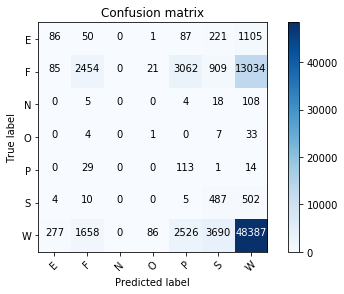

In [8]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['E', 'F','N','O','P','S','W'], 
                      title='Confusion matrix')
plt.show()

In [9]:
scores, pvalues = chi2(Xtrain,ytrain)
column_name = list(X)
coe = clf.coef_.tolist()
p_values = []
for i in pvalues:
    p_values.append(format(i,'f'))
x = pd.DataFrame(
    {'Column name': column_name,
     'P_Value': p_values,
     #'Coefficient': coe[0]
    },columns=['Column name', 'P_Value'])
x

,Column name,P_Value
0,YR_BUILT,0.000000
1,LIVING_AREA,0.000000
2,LU_A,0.000000
3,LU_CD,0.000000
4,LU_E,0.000000
5,LU_EA,0.000000
6,LU_R1,0.000000
7,LU_R2,0.000000
8,LU_R3,0.000000
9,LU_RC,0.021988
